# Analysis Of MI vs RCB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
Matches=pd.read_csv("matches.csv")

In [3]:
Matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
Matches.shape

(756, 18)

# How many rows and columns are there?

In [5]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


In [8]:
Matches.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

# 756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [9]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions 

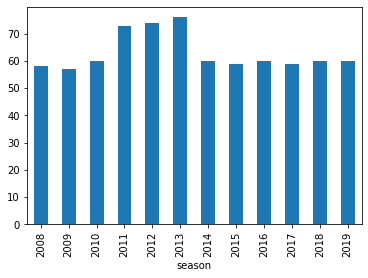

In [10]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [11]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [12]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.

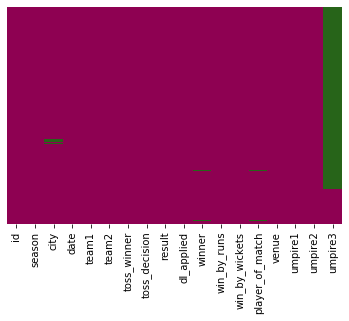

In [13]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

In [14]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


#  Removed the columns containing more missing values and have less impact on the predicting matches
 

In [15]:
Matches=Matches.drop(['umpire3','city'],axis=1)

In [16]:
Matches.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


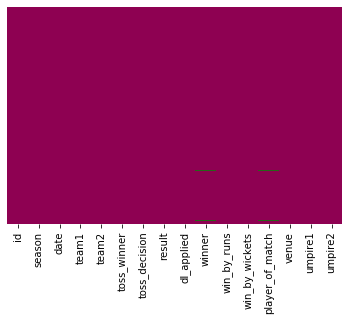

In [17]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

# Today's match is between MI and RCB.so we only want information between the matches that take place between them

In [20]:
Matches.head()

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [21]:
MI_RCB1=Matches.loc[(Matches['team1']=="Mumbai Indians")&(Matches['team2']=="Royal Challengers Bangalore")]


In [22]:
MI_RCB2=Matches.loc[(Matches['team2']=="Mumbai Indians")&(Matches['team1']=="Royal Challengers Bangalore")]


In [23]:
MI_RCB=MI_RCB1.append(MI_RCB2)

#   Complete details of matches that takes place between MI and RCB

In [24]:
MI_RCB

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
62,63,2008,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
142,143,2009,2009-05-03,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,9,JH Kallis,New Wanderers Stadium,RE Koertzen,TH Wijewardene
152,153,2009,2009-05-10,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Mumbai Indians,16,0,JP Duminy,St George's Park,BR Doctrove,BG Jerling
187,188,2010,2010-03-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,7,JH Kallis,Brabourne Stadium,HDPK Dharmasena,SS Hazare
225,226,2010,2010-04-17,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,57,0,R McLaren,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel
230,231,2010,2010-04-21,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Mumbai Indians,35,0,KA Pollard,Dr DY Patil Sports Academy,BR Doctrove,RB Tiffin
359,360,2012,2012-05-09,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,Wankhede Stadium,BF Bowden,VA Kulkarni
416,417,2013,2013-04-27,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Mumbai Indians,58,0,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani
461,462,2014,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
483,484,2014,2014-05-06,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,19,0,RG Sharma,Wankhede Stadium,S Ravi,K Srinath


# It looks like MI and RCB played 25 matches against each other

In [27]:
won_by_runs_wickest=MI_RCB.groupby('id')

In [28]:
won_by_runs_wickest.sum()

,season,dl_applied,win_by_runs,win_by_wickets
id,,,,
12,2017,0,0,4
37,2017,0,0,5
63,2008,0,0,5
90,2008,0,0,9
143,2009,0,0,9
153,2009,0,16,0
188,2010,0,0,7
226,2010,0,57,0
231,2010,0,35,0


In [29]:
MI_RCB['id'].value_counts()

63       1
383      1
417      1
226      1
7907     1
484      1
37       1
231      1
360      1
306      1
590      1
12       1
462      1
188      1
143      1
11143    1
11322    1
242      1
617      1
7924     1
534      1
367      1
153      1
90       1
562      1
Name: id, dtype: int64

In [30]:
MI_RCB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 62 to 726
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               25 non-null     int64 
 1   season           25 non-null     int64 
 2   date             25 non-null     object
 3   team1            25 non-null     object
 4   team2            25 non-null     object
 5   toss_winner      25 non-null     object
 6   toss_decision    25 non-null     object
 7   result           25 non-null     object
 8   dl_applied       25 non-null     int64 
 9   winner           25 non-null     object
 10  win_by_runs      25 non-null     int64 
 11  win_by_wickets   25 non-null     int64 
 12  player_of_match  25 non-null     object
 13  venue            25 non-null     object
 14  umpire1          25 non-null     object
 15  umpire2          25 non-null     object
dtypes: int64(5), object(11)
memory usage: 3.3+ KB


In [31]:
MI_RCB.describe

<bound method NDFrame.describe of         id  season        date                        team1  \
62      63    2008  2008-04-20               Mumbai Indians   
142    143    2009  2009-05-03               Mumbai Indians   
152    153    2009  2009-05-10               Mumbai Indians   
187    188    2010  2010-03-20               Mumbai Indians   
225    226    2010  2010-04-17               Mumbai Indians   
230    231    2010  2010-04-21               Mumbai Indians   
359    360    2012  2012-05-09               Mumbai Indians   
416    417    2013  2013-04-27               Mumbai Indians   
461    462    2014  2014-04-19               Mumbai Indians   
483    484    2014  2014-05-06               Mumbai Indians   
533    534    2015  2015-04-19               Mumbai Indians   
649   7907    2018    17/04/18               Mumbai Indians   
702  11143    2019    28/03/19               Mumbai Indians   
11      12    2017  2017-04-14  Royal Challengers Bangalore   
36      37    2017  2

In [32]:
print("No of matches that takes place between MI and KKR:",len(MI_RCB))

No of matches that takes place between MI and KKR: 25


# Below plot gives the details of the match that takes place between MI and RCB

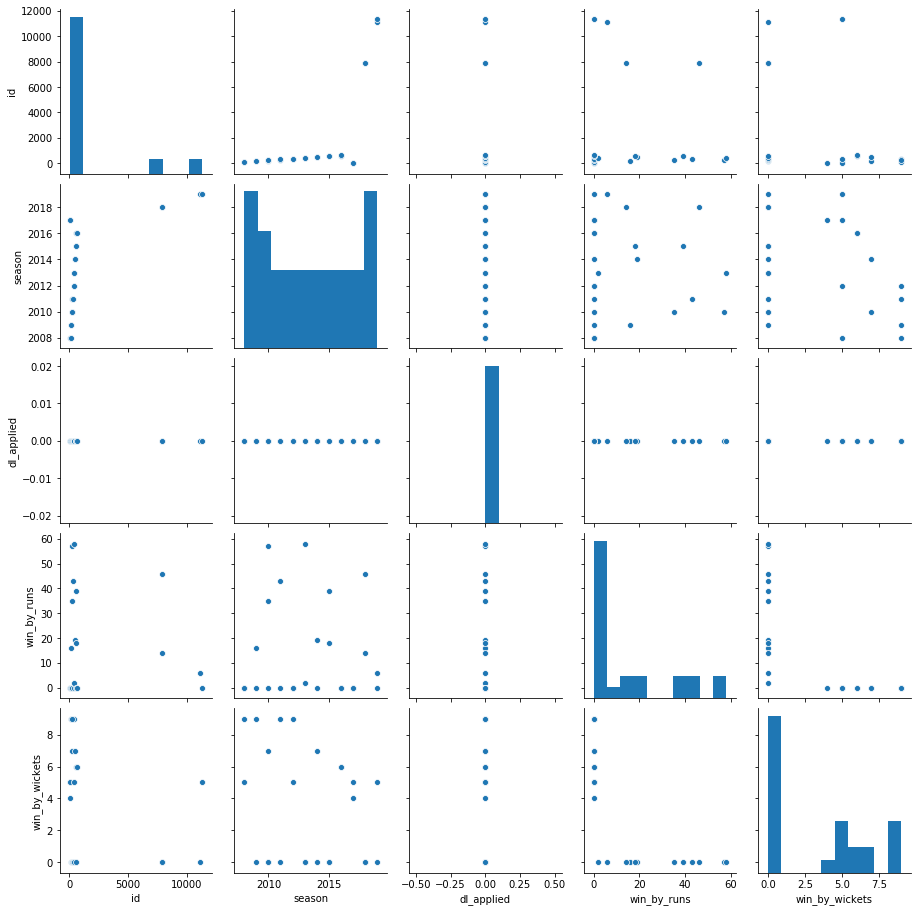

In [33]:
sns.pairplot(MI_RCB)

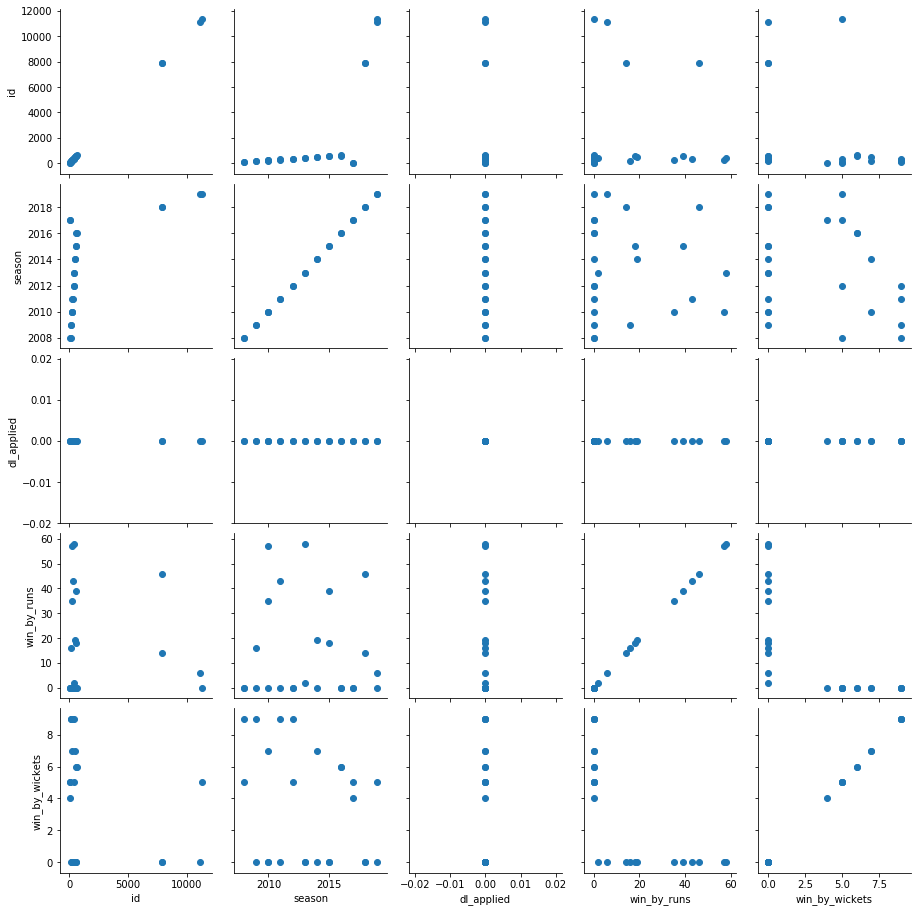

In [34]:
g=sns.PairGrid(MI_RCB)
g.map(plt.scatter)

# Now Time to answer the questions that were asked in the widhya ipl

In [35]:
MI_RCB['toss_winner'].value_counts()

Mumbai Indians                 16
Royal Challengers Bangalore     9
Name: toss_winner, dtype: int64

# Sometimes Toss plays an crucial role in deciding the winner.MI win the Toss 16 times and RCB wIn it 9 times

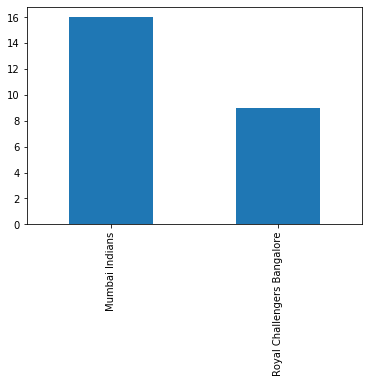

In [36]:
MI_RCB['toss_winner'].value_counts().plot(kind='bar')

In [37]:
print("No of times toss won by both teams:")
MI_RCB['toss_winner'].value_counts()

No of times toss won by both teams:


Mumbai Indians                 16
Royal Challengers Bangalore     9
Name: toss_winner, dtype: int64

# From 28 matches Mumbai Indians wins 4 Times by Batting first and 12 times by Batting second whereas Royal Challengers Bangalore wins 4 times by batting first and 5 times by batting second.

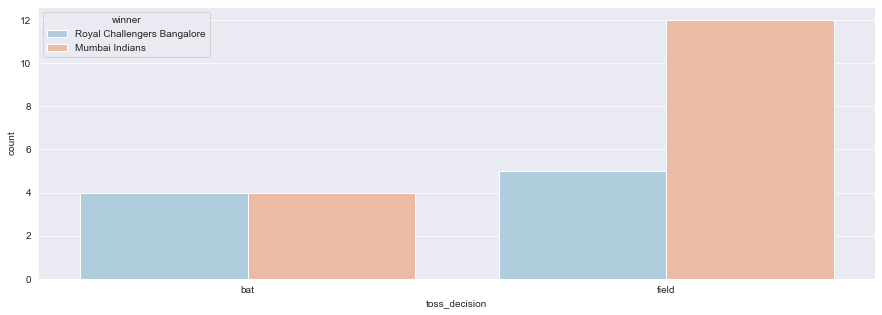

In [38]:
import sys
sys.setrecursionlimit(10000) 
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_decision',hue='winner',data=MI_RCB,palette='RdBu_r')

In [39]:
MI_RCB['winner'].value_counts()

Mumbai Indians                 16
Royal Challengers Bangalore     9
Name: winner, dtype: int64

# Mumbai Indians win 16 times (MI-win=16,loss=9) and Royal Challengers Bangalore win 9  times (RCB-win=9,loss=16)

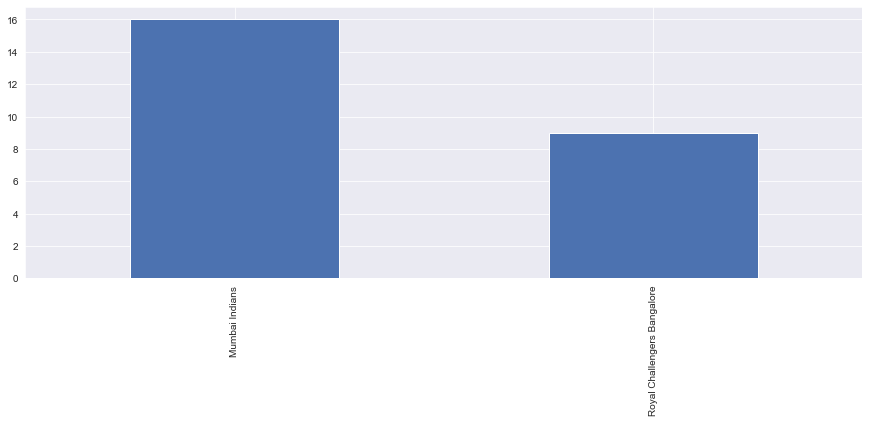

In [40]:
MI_RCB['winner'].value_counts().plot(kind='bar')

# Complete details OF  MI_RCB using sweetviz library

In [41]:
import sweetviz 
my_report=sweetviz.analyze([MI_RCB,"MI_RCB"])

:FEATURES DONE:                    |                     | [  0%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [42]:
my_report.show_html()

# Now it's time to move into deliveries data sets

In [43]:
Deliveries=pd.read_csv("deliveries.csv")

In [44]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [45]:
Deliveries.tail(5)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [46]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [47]:
Deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# Filtering the match details that only takes place between Mumbai Indians and Royal Challengers Bangalore

In [50]:
Mumbai_Bangalore1=Deliveries.loc[(Deliveries['batting_team' ] =='Mumbai Indians' ) & (Deliveries['bowling_team'] == 'Royal Challengers Bangalore')]

In [51]:
Mumbai_Bangalore2=Deliveries.loc[(Deliveries['bowling_team' ] =='Mumbai Indians' ) & (Deliveries['batting_team'] == 'Royal Challengers Bangalore')]

In [52]:
Mumbai_Bangalore=Mumbai_Bangalore1.append(Mumbai_Bangalore2)

In [53]:
Mumbai_Bangalore

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2713,12,2,Mumbai Indians,Royal Challengers Bangalore,1,1,PA Patel,JC Buttler,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2714,12,2,Mumbai Indians,Royal Challengers Bangalore,1,2,PA Patel,JC Buttler,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2715,12,2,Mumbai Indians,Royal Challengers Bangalore,1,3,PA Patel,JC Buttler,S Badree,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
2716,12,2,Mumbai Indians,Royal Challengers Bangalore,1,4,JC Buttler,PA Patel,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2717,12,2,Mumbai Indians,Royal Challengers Bangalore,1,5,JC Buttler,PA Patel,S Badree,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172157,11322,1,Royal Challengers Bangalore,Mumbai Indians,20,2,AB de Villiers,AD Nath,SL Malinga,0,...,0,0,0,0,1,0,1,AB de Villiers,run out,KA Pollard
172158,11322,1,Royal Challengers Bangalore,Mumbai Indians,20,3,AD Nath,P Negi,SL Malinga,0,...,0,0,0,0,0,0,0,AD Nath,caught,Q de Kock
172159,11322,1,Royal Challengers Bangalore,Mumbai Indians,20,4,P Negi,UT Yadav,SL Malinga,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
172160,11322,1,Royal Challengers Bangalore,Mumbai Indians,20,5,P Negi,UT Yadav,SL Malinga,0,...,0,0,0,0,0,0,0,P Negi,caught,Q de Kock


In [54]:
Mumbai_Bangalore['match_id'].value_counts()

534      262
367      256
231      255
153      255
7924     253
484      252
7907     251
306      251
562      248
11143    248
226      248
383      247
417      247
63       246
37       245
617      244
12       243
11322    242
188      239
143      238
242      237
590      237
360      233
462      230
90       217
Name: match_id, dtype: int64

In [55]:
Mumbai_Bangalore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6124 entries, 2713 to 172161
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          6124 non-null   int64 
 1   inning            6124 non-null   int64 
 2   batting_team      6124 non-null   object
 3   bowling_team      6124 non-null   object
 4   over              6124 non-null   int64 
 5   ball              6124 non-null   int64 
 6   batsman           6124 non-null   object
 7   non_striker       6124 non-null   object
 8   bowler            6124 non-null   object
 9   is_super_over     6124 non-null   int64 
 10  wide_runs         6124 non-null   int64 
 11  bye_runs          6124 non-null   int64 
 12  legbye_runs       6124 non-null   int64 
 13  noball_runs       6124 non-null   int64 
 14  penalty_runs      6124 non-null   int64 
 15  batsman_runs      6124 non-null   int64 
 16  extra_runs        6124 non-null   int64 
 17  total_run

In [56]:
Mumbai_Bangalore.describe

<bound method NDFrame.describe of         match_id  inning                 batting_team  \
2713          12       2               Mumbai Indians   
2714          12       2               Mumbai Indians   
2715          12       2               Mumbai Indians   
2716          12       2               Mumbai Indians   
2717          12       2               Mumbai Indians   
...          ...     ...                          ...   
172157     11322       1  Royal Challengers Bangalore   
172158     11322       1  Royal Challengers Bangalore   
172159     11322       1  Royal Challengers Bangalore   
172160     11322       1  Royal Challengers Bangalore   
172161     11322       1  Royal Challengers Bangalore   

                       bowling_team  over  ball         batsman  \
2713    Royal Challengers Bangalore     1     1        PA Patel   
2714    Royal Challengers Bangalore     1     2        PA Patel   
2715    Royal Challengers Bangalore     1     3        PA Patel   
2716    Royal

# Check For any Null values

In [57]:
Mumbai_Bangalore.isnull().sum()

match_id               0
inning                 0
batting_team           0
bowling_team           0
over                   0
ball                   0
batsman                0
non_striker            0
bowler                 0
is_super_over          0
wide_runs              0
bye_runs               0
legbye_runs            0
noball_runs            0
penalty_runs           0
batsman_runs           0
extra_runs             0
total_runs             0
player_dismissed    5847
dismissal_kind      5847
fielder             5918
dtype: int64

# Looks like we have huge null(NaN) values in  player_dismissed,dismissal_kind,fielder columns

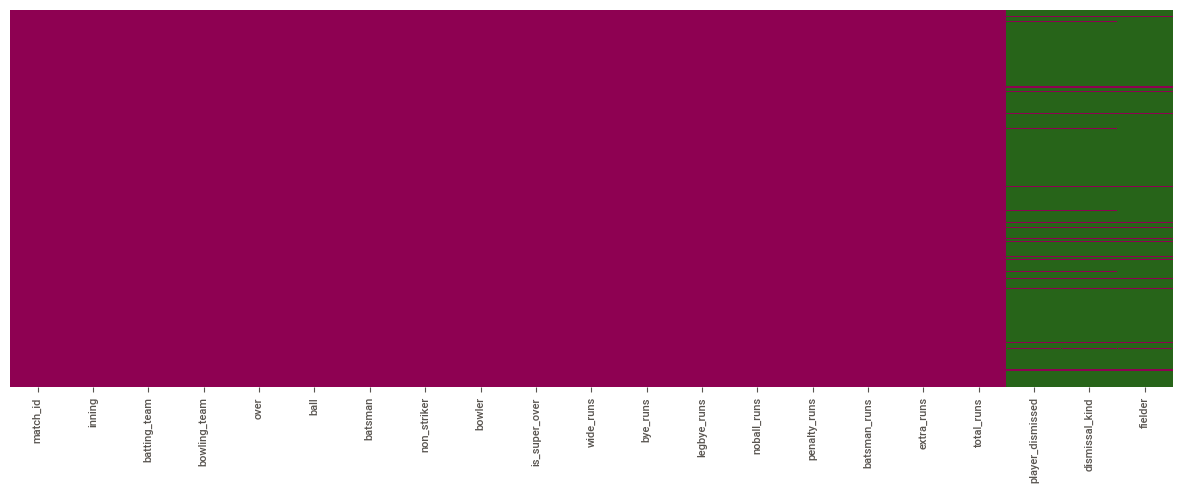

In [58]:
sns.heatmap(Mumbai_Bangalore.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

# Replace the NaN values to 0

In [59]:
Mumbai_Bangalore.fillna(0,inplace=True)

# Now it's clear

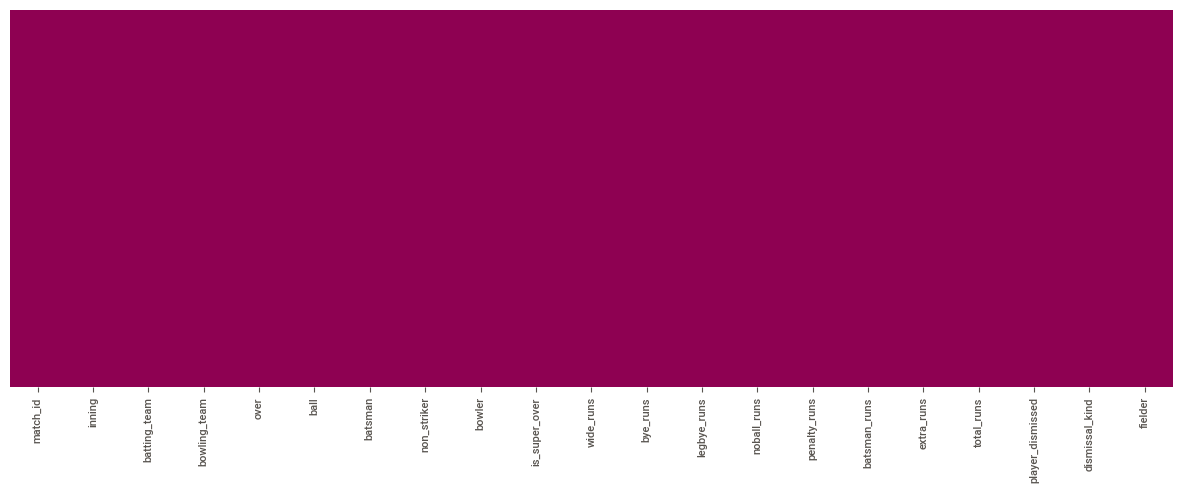

In [60]:
sns.heatmap(Mumbai_Bangalore.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

# # Let's try covariance to find relation among features

In [61]:
Mumbai_Bangalore.cov()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.208754e+07,13.149443,276.799534,-12.108889,0.0,0.044338,5.568950,-8.999515,-0.652813,0.0,264.221876,-4.039041,260.182835
inning,1.314944e+01,0.249971,-0.072281,-0.002826,0.0,-0.001972,-0.001421,-0.002586,-0.000291,0.0,-0.009217,-0.006271,-0.015487
over,2.767995e+02,-0.072281,32.482104,-0.081870,0.0,-0.044423,0.001815,-0.005935,0.009985,0.0,1.229056,-0.038558,1.190498
ball,-1.210889e+01,-0.002826,-0.081870,3.328941,0.0,-0.013646,0.001947,-0.006656,0.004300,0.0,0.090665,-0.014054,0.076610
is_super_over,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
wide_runs,4.433781e-02,-0.001972,-0.044423,-0.013646,0.0,0.094263,-0.000279,-0.001086,-0.000202,0.0,-0.037981,0.092695,0.054715
bye_runs,5.568950e+00,-0.001421,0.001815,0.001947,0.0,-0.000279,0.017930,-0.000134,-0.000025,0.0,-0.003629,0.017492,0.013862
legbye_runs,-8.999515e+00,-0.002586,-0.005935,-0.006656,0.0,-0.001086,-0.000134,0.038347,-0.000097,0.0,-0.025946,0.037029,0.011083
noball_runs,-6.528135e-01,-0.000291,0.009985,0.004300,0.0,-0.000202,-0.000025,-0.000097,0.004228,0.0,0.003812,0.003904,0.007716
penalty_runs,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


# it's diffult to interpret covariance.Let's try correlation.Correlation clearly mentions using discrete values 1=positively correlated,-1=Negatively correlated,0=No correlation.

In [62]:
Mumbai_Bangalore.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.007565,0.013969,-0.001909,NaN,0.000042,0.011962,-0.013219,-0.002888,NaN,0.046387,-0.002988,0.045478
inning,0.007565,1.000000,-0.025366,-0.003098,NaN,-0.012849,-0.021224,-0.026413,-0.008959,NaN,-0.011252,-0.032262,-0.018824
over,0.013969,-0.025366,1.000000,-0.007873,NaN,-0.025387,0.002378,-0.005318,0.026943,NaN,0.131627,-0.017403,0.126940
ball,-0.001909,-0.003098,-0.007873,1.000000,NaN,-0.024361,0.007969,-0.018628,0.036248,NaN,0.030331,-0.019815,0.025517
is_super_over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wide_runs,0.000042,-0.012849,-0.025387,-0.024361,NaN,1.000000,-0.006796,-0.018071,-0.010107,NaN,-0.075507,0.776650,0.108300
bye_runs,0.011962,-0.021224,0.002378,0.007969,NaN,-0.006796,1.000000,-0.005126,-0.002867,NaN,-0.016544,0.336028,0.062912
legbye_runs,-0.013219,-0.026413,-0.005318,-0.018628,NaN,-0.018071,-0.005126,1.000000,-0.007624,NaN,-0.080873,0.486425,0.034394
noball_runs,-0.002888,-0.008959,0.026943,0.036248,NaN,-0.010107,-0.002867,-0.007624,1.000000,NaN,0.035779,0.154460,0.072112
penalty_runs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


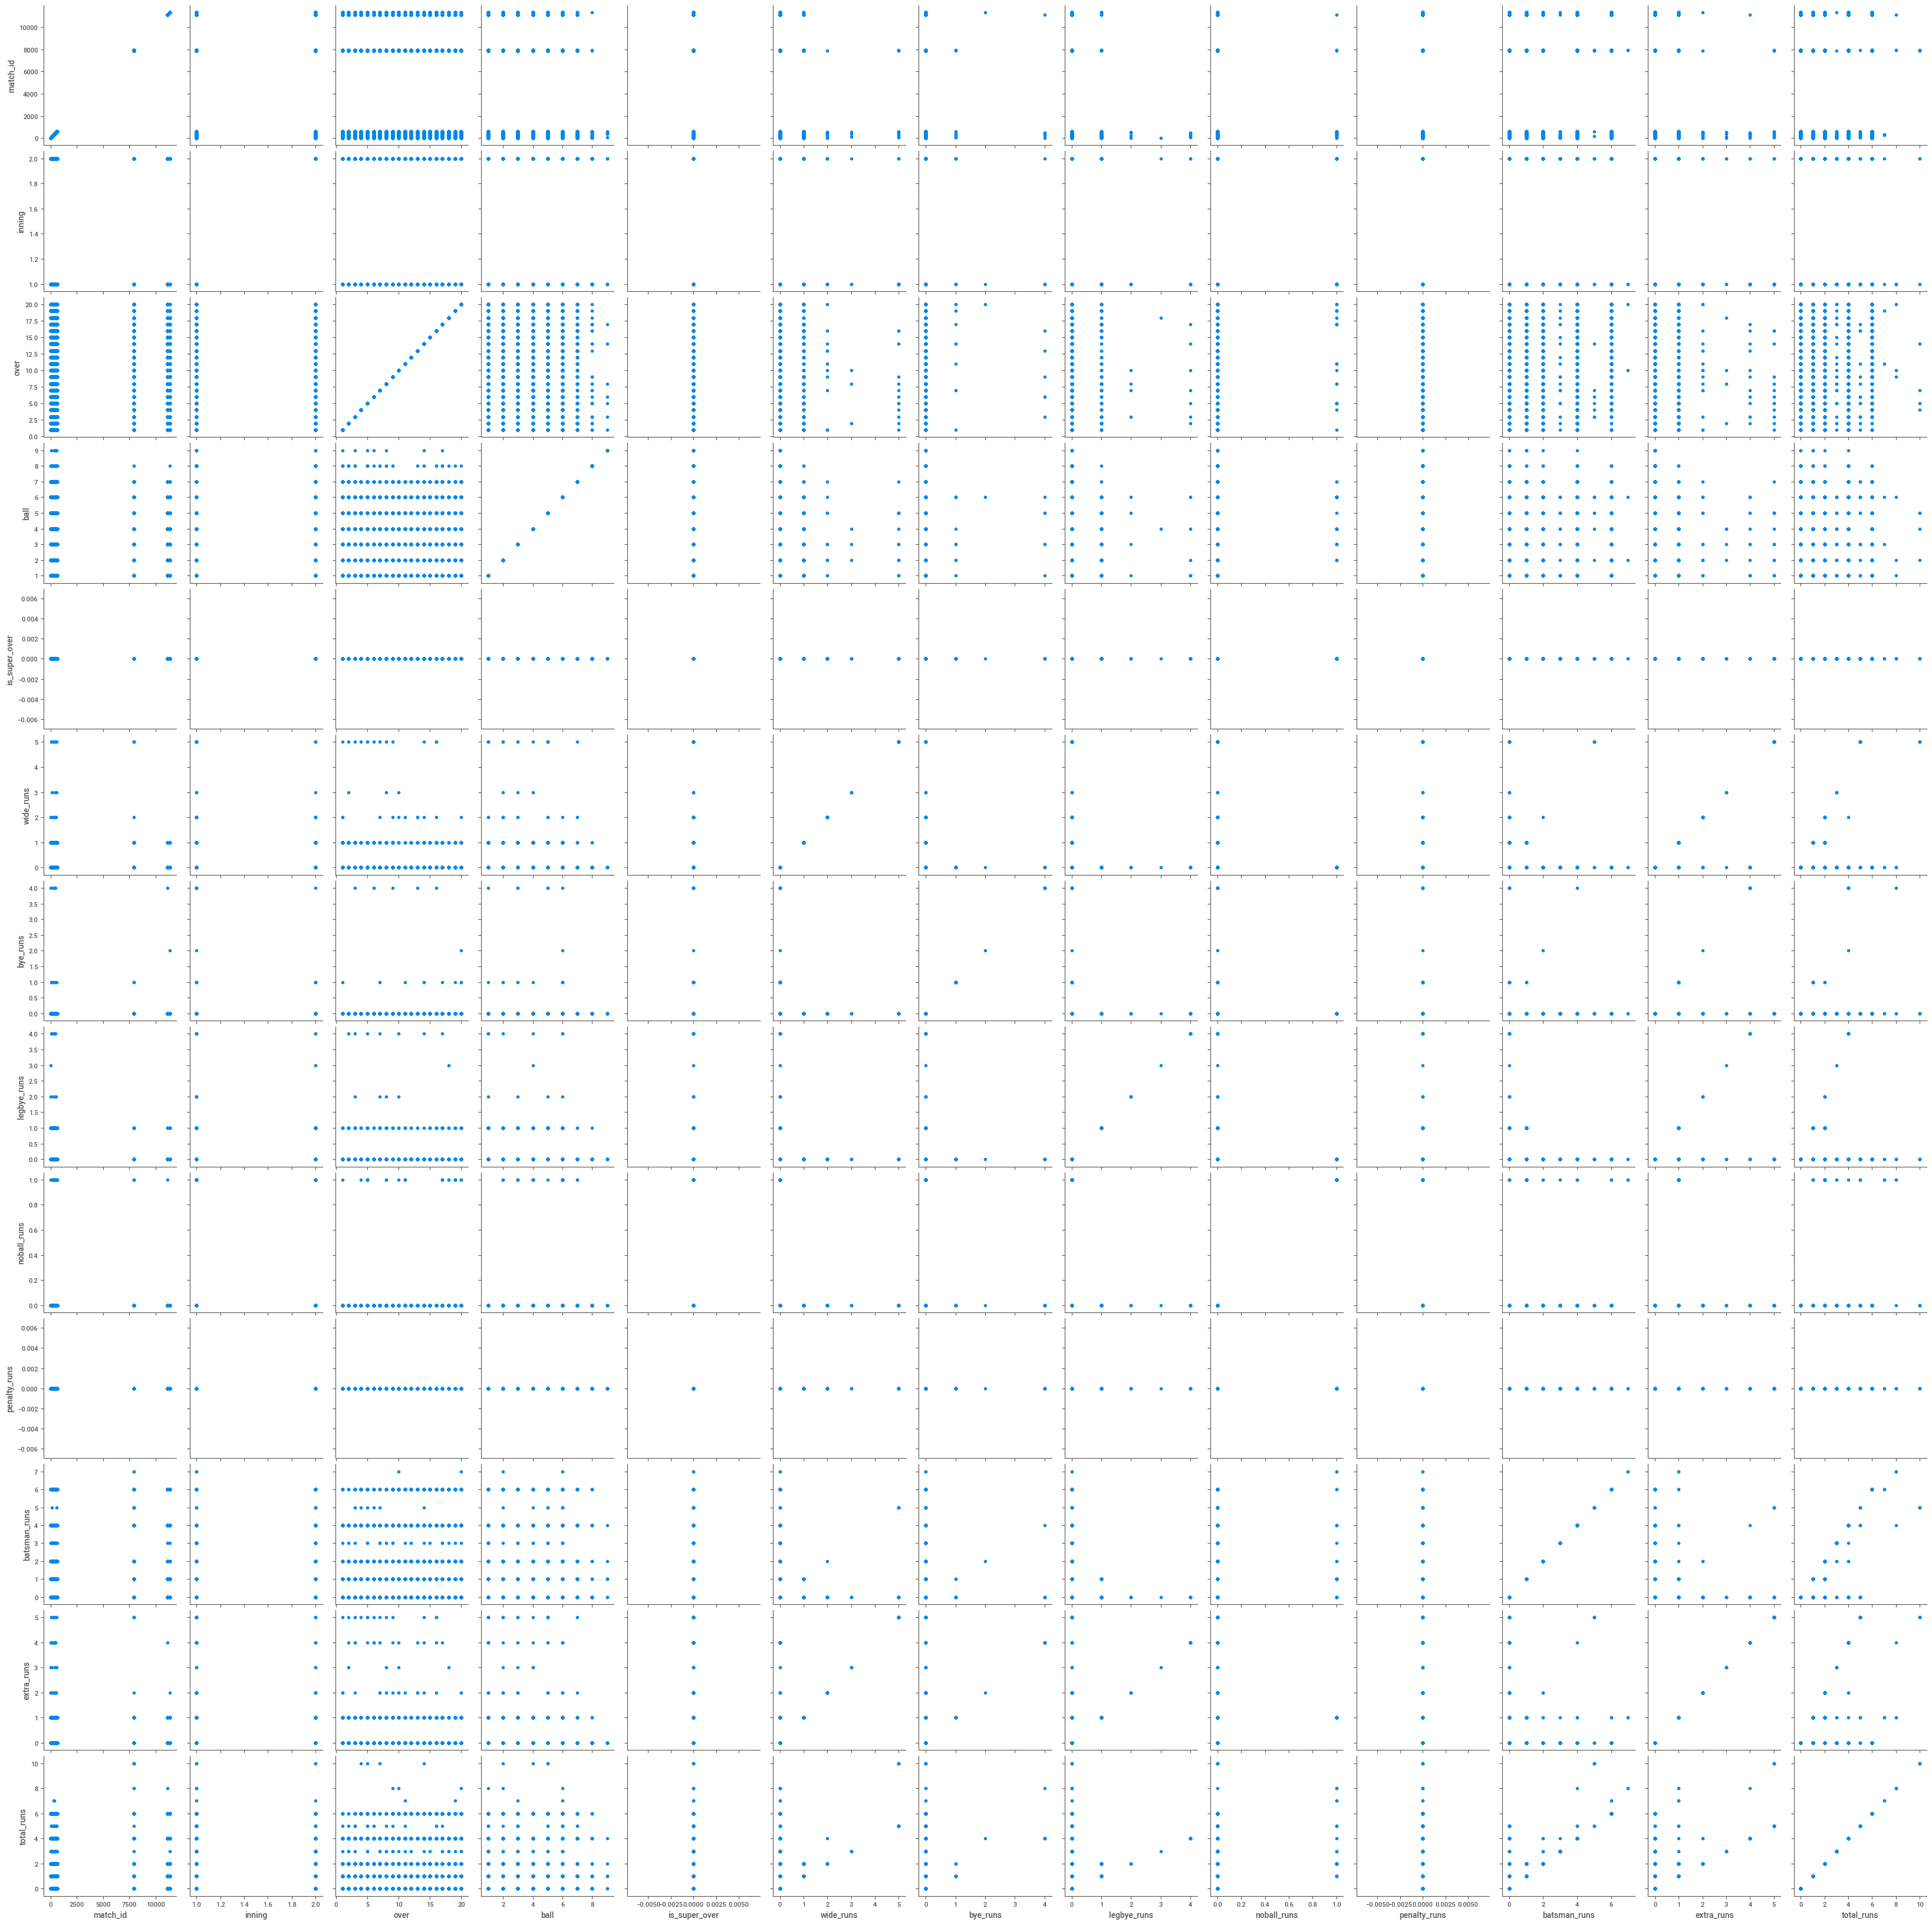

In [63]:
g=sns.PairGrid(Mumbai_Bangalore)
g.map(plt.scatter)

# # Ball by Ball Details of MI VS RCB From 25 matches 

In [64]:
Mumbai_Bangalore

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2713,12,2,Mumbai Indians,Royal Challengers Bangalore,1,1,PA Patel,JC Buttler,S Badree,0,...,0,0,0,0,0,0,0,0,0,0
2714,12,2,Mumbai Indians,Royal Challengers Bangalore,1,2,PA Patel,JC Buttler,S Badree,0,...,0,0,0,0,0,0,0,0,0,0
2715,12,2,Mumbai Indians,Royal Challengers Bangalore,1,3,PA Patel,JC Buttler,S Badree,0,...,0,0,0,0,0,2,2,0,0,0
2716,12,2,Mumbai Indians,Royal Challengers Bangalore,1,4,JC Buttler,PA Patel,S Badree,0,...,0,0,0,0,0,0,0,0,0,0
2717,12,2,Mumbai Indians,Royal Challengers Bangalore,1,5,JC Buttler,PA Patel,S Badree,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172157,11322,1,Royal Challengers Bangalore,Mumbai Indians,20,2,AB de Villiers,AD Nath,SL Malinga,0,...,0,0,0,0,1,0,1,AB de Villiers,run out,KA Pollard
172158,11322,1,Royal Challengers Bangalore,Mumbai Indians,20,3,AD Nath,P Negi,SL Malinga,0,...,0,0,0,0,0,0,0,AD Nath,caught,Q de Kock
172159,11322,1,Royal Challengers Bangalore,Mumbai Indians,20,4,P Negi,UT Yadav,SL Malinga,0,...,0,0,0,0,0,0,0,0,0,0
172160,11322,1,Royal Challengers Bangalore,Mumbai Indians,20,5,P Negi,UT Yadav,SL Malinga,0,...,0,0,0,0,0,0,0,P Negi,caught,Q de Kock


In [65]:
Complete_Details=Mumbai_Bangalore.groupby('match_id')

In [66]:
Complete_Details.sum()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,,,,,,,,,,,,
12,362,2490,884,0,10,4,9,1,0,263,24,287
37,368,2570,875,0,7,0,4,0,0,316,11,327
63,369,2566,884,0,8,2,6,0,0,315,16,331
90,319,1981,809,0,21,0,2,1,0,224,24,248
143,354,2369,863,0,10,0,3,1,0,285,14,299
153,383,2650,948,0,15,0,6,0,0,277,21,298
188,354,2431,849,0,4,1,11,0,0,290,16,306
226,370,2603,896,0,13,1,6,0,0,305,20,325
231,383,2684,947,0,16,0,4,3,0,310,23,333


# From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

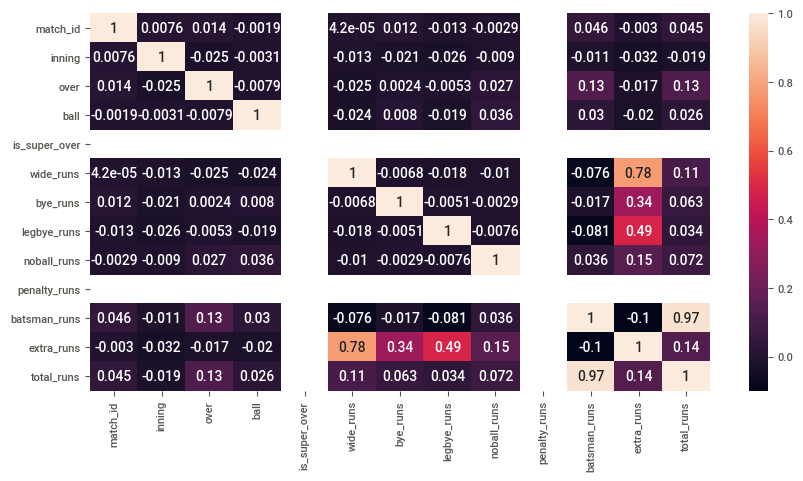

In [67]:
plt.figure(figsize=(10,5))
sns.heatmap(Mumbai_Bangalore.corr(),yticklabels=True,annot=True)

# How many batsman from both teams will have a Strike rate more than 130 and hit more than 3 boundaries?

# Quinton_De_Kock_strike_rate

In [69]:
Quinton_De_Kock_strike_rate=Mumbai_Bangalore1.loc[(Mumbai_Bangalore1['batsman']=='Q de Kock')]

In [70]:
Quinton_De_Kock_strike_rate

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
166201,11143,1,Mumbai Indians,Royal Challengers Bangalore,1,1,Q de Kock,RG Sharma,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
166202,11143,1,Mumbai Indians,Royal Challengers Bangalore,1,2,Q de Kock,RG Sharma,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
166207,11143,1,Mumbai Indians,Royal Challengers Bangalore,2,1,Q de Kock,RG Sharma,N Saini,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
166208,11143,1,Mumbai Indians,Royal Challengers Bangalore,2,2,Q de Kock,RG Sharma,N Saini,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
166213,11143,1,Mumbai Indians,Royal Challengers Bangalore,3,1,Q de Kock,RG Sharma,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
166217,11143,1,Mumbai Indians,Royal Challengers Bangalore,3,5,Q de Kock,RG Sharma,UT Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
166218,11143,1,Mumbai Indians,Royal Challengers Bangalore,3,6,Q de Kock,RG Sharma,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
166219,11143,1,Mumbai Indians,Royal Challengers Bangalore,4,1,Q de Kock,RG Sharma,N Saini,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
166225,11143,1,Mumbai Indians,Royal Challengers Bangalore,5,1,Q de Kock,RG Sharma,Mohammed Siraj,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
166226,11143,1,Mumbai Indians,Royal Challengers Bangalore,5,2,Q de Kock,RG Sharma,Mohammed Siraj,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [72]:
Quinton_De_Kock_strike_rate['batsman_runs'].value_counts()

0    22
1    12
4     7
6     3
2     3
Name: batsman_runs, dtype: int64

In [96]:
Quinton_De_Kock_strike_Rate=Quinton_De_Kock_strike_rate.loc[(Quinton_De_Kock_strike_rate['batsman_runs']!=0)&(Quinton_De_Kock_strike_rate['extra_runs']==0)]   
Quinton_De_Kock_strike_Rate['ball'].value_counts()

5    5
4    5
6    4
1    4
3    3
2    3
Name: ball, dtype: int64

In [75]:
len(Quinton_De_Kock_strike_rate['match_id'].value_counts())

2

In [103]:
print("Average strike rate of  quinton de kock in a single match",(64//24)*100)
print("Average Boundaries hit by quinton de kock in a single match",(10//2))

Average strike rate of  quinton de kock in a single match 200
Average Boundaries hit by quinton de kock in a single match 5


# Rohit_Sharma_strike_rate

In [84]:
Rohit_Sharma_strike_rate=Mumbai_Bangalore1.loc[(Mumbai_Bangalore1['batsman']=='RG Sharma')]

In [85]:
Rohit_Sharma_strike_rate['batsman_runs'].value_counts()

1    137
0    117
4     44
6     21
2     15
5      1
Name: batsman_runs, dtype: int64

In [86]:
len(Rohit_Sharma_strike_rate['match_id'].value_counts())


17

In [95]:
Rohit_Sharma_strike_Rate=Rohit_Sharma_strike_rate.loc[(Rohit_Sharma_strike_rate['batsman_runs']!=0)&(Rohit_Sharma_strike_rate['extra_runs']==0)]                               
Rohit_Sharma_strike_Rate['ball'].value_counts()

4    38
2    36
3    35
6    33
1    33
5    32
7     5
Name: ball, dtype: int64

In [102]:
print("Average strike rate of Rohit sharma in a single match",(474/212)*100)
print("Average Boundaries hit by Rohit sharma in a single match",(65//17))

Average strike rate of Rohit sharma in a single match 223.58490566037736
Average Boundaries hit by Rohit sharma in a single match 3


# Kieron pollard Strike rate

In [99]:
KPollard_strike_rate=Mumbai_Bangalore1.loc[(Mumbai_Bangalore1['batsman']=='KA Pollard')]

In [100]:
KPollard_strike_rate['batsman_runs'].value_counts()

1    117
0    108
4     36
6     27
2     22
3      2
5      1
Name: batsman_runs, dtype: int64

In [105]:
len(KPollard_strike_rate['match_id'].value_counts())

19

In [101]:
KPollard_strike_Rate=KPollard_strike_rate.loc[(KPollard_strike_rate['batsman_runs']!=0)&(KPollard_strike_rate['extra_runs']==0)]                               
KPollard_strike_Rate['ball'].value_counts()

6    37
3    33
5    32
2    32
4    30
1    29
7     7
8     1
Name: ball, dtype: int64

In [106]:
print("Average strike rate of  Kieron Pollard in a single match",(478/201)*100)
print("Average Boundaries hit by kieron Pollar in a single match",(67//19))

Average strike rate of  Kieron Pollard in a single match 237.81094527363186
Average Boundaries hit by kieron Pollar in a single match 3


# V Kohli Strike Rate

In [110]:
Virat_kohli_strike_rate=Mumbai_Bangalore2.loc[(Mumbai_Bangalore2['batsman']=='V Kohli')]
Virat_kohli_strike_rate['batsman_runs'].value_counts()

1    215
0    176
4     52
2     29
6     24
3      1
Name: batsman_runs, dtype: int64

In [111]:
len(Virat_kohli_strike_rate['match_id'].value_counts())

24

In [112]:
Virat_kohli_strike_Rate=Virat_kohli_strike_rate.loc[(Virat_kohli_strike_rate['batsman_runs']!=0)&(Virat_kohli_strike_rate['extra_runs']==0)]                    
Virat_kohli_strike_Rate['ball'].value_counts()

1    62
3    55
6    50
4    47
2    47
5    45
7    10
9     1
Name: ball, dtype: int64

In [113]:
print("Average strike rate of  Virat Kohli in a single match",(628/317)*100)
print("Average Boundaries hit by Virat Kohli in a single match",(76//24))

Average strike rate of  Virat Kohli in a single match 198.1072555205047
Average Boundaries hit by Virat Kohli in a single match 3


# AB de Villiers strike Rate

In [115]:
ABD_strike_rate=Mumbai_Bangalore2.loc[(Mumbai_Bangalore2['batsman']=='AB de Villiers')]
ABD_strike_rate['batsman_runs'].value_counts()

1    171
0    124
4     50
6     26
2     19
3      1
Name: batsman_runs, dtype: int64

In [116]:
len(ABD_strike_rate['match_id'].value_counts())

15

In [117]:
ABD_strike_Rate=ABD_strike_rate.loc[(ABD_strike_rate['batsman_runs']!=0)&(ABD_strike_rate['extra_runs']==0)]                    
ABD_strike_Rate['ball'].value_counts()

6    53
4    48
3    42
2    39
5    35
1    35
7     9
Name: ball, dtype: int64

In [118]:
print("Average strike rate of  AB de villiers in a single match",(568/261)*100)
print("Average Boundaries hit by AB de villiers in a single match",(76//15))

Average strike rate of  AB de villiers in a single match 217.62452107279694
Average Boundaries hit by AB de villiers in a single match 5


# How many Runs  more/less MI ll score in the first 6 overs as compared to RCB?

#  MI in the First Six overs

In [124]:
MI_Runs_First_6_Overs=Mumbai_Bangalore1.loc[(Mumbai_Bangalore1['over']<=6)]

In [125]:
MI_Runs_First_6_Overs['total_runs'].value_counts()

0     453
1     276
4     137
2      57
6      21
5       7
10      2
3       2
Name: total_runs, dtype: int64

In [126]:
len(MI_Runs_First_6_Overs['match_id'].value_counts())

25

In [123]:
print("Average Runs scored by MI in the First Six overs in a single match",1125//25)

Average Runs scored by MI in the First Six overs in a single match 45


# RCB_Runs_First_6_Overs

In [127]:
RCB_Runs_First_6_Overs=Mumbai_Bangalore2.loc[(Mumbai_Bangalore2['over']<=6)]

In [128]:
RCB_Runs_First_6_Overs['total_runs'].value_counts()

0    459
1    268
4    129
2     45
6     30
3      4
5      2
Name: total_runs, dtype: int64

In [130]:
len(RCB_Runs_First_6_Overs['match_id'].value_counts())

25

In [131]:
print("Average Runs scored by RCB in the First Six overs in a single match",1076//25)

Average Runs scored by RCB in the First Six overs in a single match 43


In [132]:
print("Average Runs scored by MI in the First Six overs in a single match",1125//25)

Average Runs scored by MI in the First Six overs in a single match 45


In [133]:
print("MI will score 0-5 Runs more/less than RCB")

MI will score 0-5 Runs more/less than RCB


# How many Bowlers in the match from both the teams will get 2 or more wickets and will have an economy of less than 8?

# Jasprit Bumrah Wickets and Economy

In [140]:
Jasprit_Bumrah_Wickets_Economy=Mumbai_Bangalore2.loc[(Mumbai_Bangalore2['bowler']=='JJ Bumrah')]

In [141]:
Jasprit_Bumrah_Wickets_Economy

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2633,12,1,Royal Challengers Bangalore,Mumbai Indians,8,1,V Kohli,CH Gayle,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2634,12,1,Royal Challengers Bangalore,Mumbai Indians,8,2,V Kohli,CH Gayle,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2635,12,1,Royal Challengers Bangalore,Mumbai Indians,8,3,V Kohli,CH Gayle,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2636,12,1,Royal Challengers Bangalore,Mumbai Indians,8,4,CH Gayle,V Kohli,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2637,12,1,Royal Challengers Bangalore,Mumbai Indians,8,5,V Kohli,CH Gayle,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172151,11322,1,Royal Challengers Bangalore,Mumbai Indians,19,2,AB de Villiers,AD Nath,JJ Bumrah,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
172152,11322,1,Royal Challengers Bangalore,Mumbai Indians,19,3,AB de Villiers,AD Nath,JJ Bumrah,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
172153,11322,1,Royal Challengers Bangalore,Mumbai Indians,19,4,AB de Villiers,AD Nath,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
172154,11322,1,Royal Challengers Bangalore,Mumbai Indians,19,5,AB de Villiers,AD Nath,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [142]:
Jasprit_Bumrah_Wickets_Economy['dismissal_kind'].value_counts()

caught     11
run out     4
bowled      3
lbw         2
Name: dismissal_kind, dtype: int64

In [143]:
Jasprit_Bumrah_Wickets_Economy['batsman_runs'].value_counts()

0    125
1    116
4     29
2     22
6     16
3      2
Name: batsman_runs, dtype: int64

In [166]:
Jasprit_Bumrah_Wickets_Economy['ball'].value_counts()

1    51
6    50
5    50
4    50
3    50
2    50
7     7
9     1
8     1
Name: ball, dtype: int64

In [144]:
len(Jasprit_Bumrah_Wickets_Economy['match_id'].value_counts())#only played 13 matches against RCB

13

In [169]:
print("Average economy of Jasprit Bumrah in a single match",(378//(310//6)))
print("Average wickets taken by Bumrah in a single match",20//13)

Average economy of Jasprit Bumrah in a single match 7
Average wickets taken by Bumrah in a single match 1


# R chahar Wickets and Economy

In [150]:
R_Chahar_Wickets_Economy=Mumbai_Bangalore2.loc[(Mumbai_Bangalore2['bowler']=='RD Chahar')]

In [159]:
R_Chahar_Wickets_Economy

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
172084,11322,1,Royal Challengers Bangalore,Mumbai Indians,8,1,AB de Villiers,M Ali,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
172085,11322,1,Royal Challengers Bangalore,Mumbai Indians,8,2,AB de Villiers,M Ali,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
172086,11322,1,Royal Challengers Bangalore,Mumbai Indians,8,3,AB de Villiers,M Ali,RD Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
172087,11322,1,Royal Challengers Bangalore,Mumbai Indians,8,4,AB de Villiers,M Ali,RD Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
172088,11322,1,Royal Challengers Bangalore,Mumbai Indians,8,5,M Ali,AB de Villiers,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
172089,11322,1,Royal Challengers Bangalore,Mumbai Indians,8,6,M Ali,AB de Villiers,RD Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
172096,11322,1,Royal Challengers Bangalore,Mumbai Indians,10,1,M Ali,AB de Villiers,RD Chahar,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
172097,11322,1,Royal Challengers Bangalore,Mumbai Indians,10,2,M Ali,AB de Villiers,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
172098,11322,1,Royal Challengers Bangalore,Mumbai Indians,10,3,M Ali,AB de Villiers,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
172099,11322,1,Royal Challengers Bangalore,Mumbai Indians,10,4,M Ali,AB de Villiers,RD Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [160]:
R_Chahar_Wickets_Economy['dismissal_kind'].value_counts()# Zero player dismissed by Rahul chahar against RCB from 1 match

Series([], Name: dismissal_kind, dtype: int64)

In [152]:
R_Chahar_Wickets_Economy['batsman_runs'].value_counts()

1    11
0     9
6     2
4     2
Name: batsman_runs, dtype: int64

In [153]:
len(R_Chahar_Wickets_Economy['match_id'].value_counts())#only played 1 matches against RCB

1

In [154]:
R_Chahar_Wickets_Economy['ball'].value_counts()

6    4
5    4
4    4
3    4
2    4
1    4
Name: ball, dtype: int64

In [161]:
print("Average economy of R Chahar in a single match",(31//4))
print("Average wickets taken by R Chahar in a single match",0//1)

Average economy of R Chahar in a single match 7
Average wickets taken by R Chahar in a single match 0


# YS Chahal Wickets and Economy

In [162]:
YS_Chahal_Wickets_Economy=Mumbai_Bangalore1.loc[(Mumbai_Bangalore1['bowler']=='YS Chahal')]

In [163]:
YS_Chahal_Wickets_Economy['dismissal_kind'].value_counts()

caught     13
stumped     2
bowled      1
Name: dismissal_kind, dtype: int64

In [164]:
len(YS_Chahal_Wickets_Economy['match_id'].value_counts())#only played 11 matches

11

In [170]:
YS_Chahal_Wickets_Economy['ball'].value_counts()

6    42
5    42
4    42
3    42
2    42
1    42
7     5
8     1
Name: ball, dtype: int64

In [172]:
YS_Chahal_Wickets_Economy['batsman_runs'].value_counts()

1    110
0     96
6     20
4     17
2     13
5      1
3      1
Name: batsman_runs, dtype: int64

In [174]:
print("Average economy of YS Chahal in a single match",(332//(264//6)))
print("Average wickets taken by YS Chahal in a single match",16//11)

Average economy of YS Chahal in a single match 7
Average wickets taken by YS Chahal in a single match 1


# Mohammed Siraj Wickets  and Economy

In [175]:
Mohammed_Siraj_Wickets_Economy=Mumbai_Bangalore1.loc[(Mumbai_Bangalore1['bowler']=='Mohammed_Siraj')]

In [176]:
Mohammed_Siraj_Wickets_Economy['batsman_runs'].value_counts()

Series([], Name: batsman_runs, dtype: int64)

In [177]:
len(Mohammed_Siraj_Wickets_Economy['match_id'].value_counts())#only played 0 matches against MI

0

In [178]:
print("Mohammed Siraj did not play any game against MI")

Mohammed Siraj did not play any game against MI


# N Saini wickets and Economy

In [179]:
N_Saini_Wickets_Economy=Mumbai_Bangalore1.loc[(Mumbai_Bangalore1['bowler']=='N Saini')]

In [180]:
N_Saini_Wickets_Economy['batsman_runs'].value_counts()

0    17
1    13
4     8
6     4
3     1
2     1
Name: batsman_runs, dtype: int64

In [181]:
len(N_Saini_Wickets_Economy['match_id'].value_counts())#only played 2 matches against MI

2

In [182]:
N_Saini_Wickets_Economy['ball'].value_counts()

6    7
5    7
4    7
3    7
2    7
1    7
7    2
Name: ball, dtype: int64

In [183]:
N_Saini_Wickets_Economy['dismissal_kind'].value_counts()#zero wickets For N saini

Series([], Name: dismissal_kind, dtype: int64)

In [184]:
print("Average economy of N saini in a single match",(74//(44//6)))
print("Average wickets taken by N saini in a single match",0//2)

Average economy of N saini in a single match 10
Average wickets taken by N saini in a single match 0


# Washington Sundar Wickets And Economy

In [185]:
Washington_Sundar_Wickets_Economy=Mumbai_Bangalore1.loc[(Mumbai_Bangalore1['bowler']=='Washington Sundar')]

In [186]:
Washington_Sundar_Wickets_Economy['batsman_runs'].value_counts()

1    8
4    5
6    2
0    2
5    1
2    1
Name: batsman_runs, dtype: int64

In [187]:
len(Washington_Sundar_Wickets_Economy['match_id'].value_counts())##only played 2 matches against MI

2

In [189]:
Washington_Sundar_Wickets_Economy['dismissal_kind'].value_counts()#Zero wickets against MI

Series([], Name: dismissal_kind, dtype: int64)

In [191]:
Washington_Sundar_Wickets_Economy['ball'].value_counts()

6    3
5    3
4    3
3    3
2    3
1    3
7    1
Name: ball, dtype: int64

In [192]:
print("Average economy of Washington Sundar in a single match",(47//(19//6)))
print("Average wickets taken by Washington Sundarin a single match",0//2)

Average economy of Washington Sundar in a single match 15
Average wickets taken by Washington Sundarin a single match 0


#   We can predict the match results from this analysis but current form of  players plays an huge role in predicting the winner in this match